# Linear Regression and methods for optimize params

--------------------------

Links for understand topic:
* Stanford CS299: https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2

Today, I want to talk about one of the main topics in machine learning—the linear regression algorithm. I also want to write about methods for optimize params of the model.

The hypothesis function for linear regression is:

$$ h_\theta(\mathbf{x}) = \boldsymbol{\theta}^T \mathbf{x} $$

or

$$ h_\theta(\mathbf{x}) = \boldsymbol{\theta}_0 + \boldsymbol{\theta}_1 * \mathbf{x}_1 + ... + \boldsymbol{\theta}_i * \mathbf{x}_i $$

**where:**
* $x$ - is training examples
* $h_\theta(x)$ - is hypothesis (our target)
* $\theta$ - is parameters (also called weights)

*Now, given a training set, how do we pick, or learn, **the parameters $\theta$** ?*

To formulize this, we will define a function that *measures*, for each value of the $\theta$'s how close the $h_\theta(x_i)$'s (prediction) are to the **corresponding** $y_i$'s (target). We define the **Cost function** (MSE):

$$ J(\boldsymbol{\theta}) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2 $$



**Optimization methods** which I will use for **linear regression**:
- *Batch* Gradient Descent
- *Stohastic* Gradient Descent
- *Normal Equation* (close form)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)

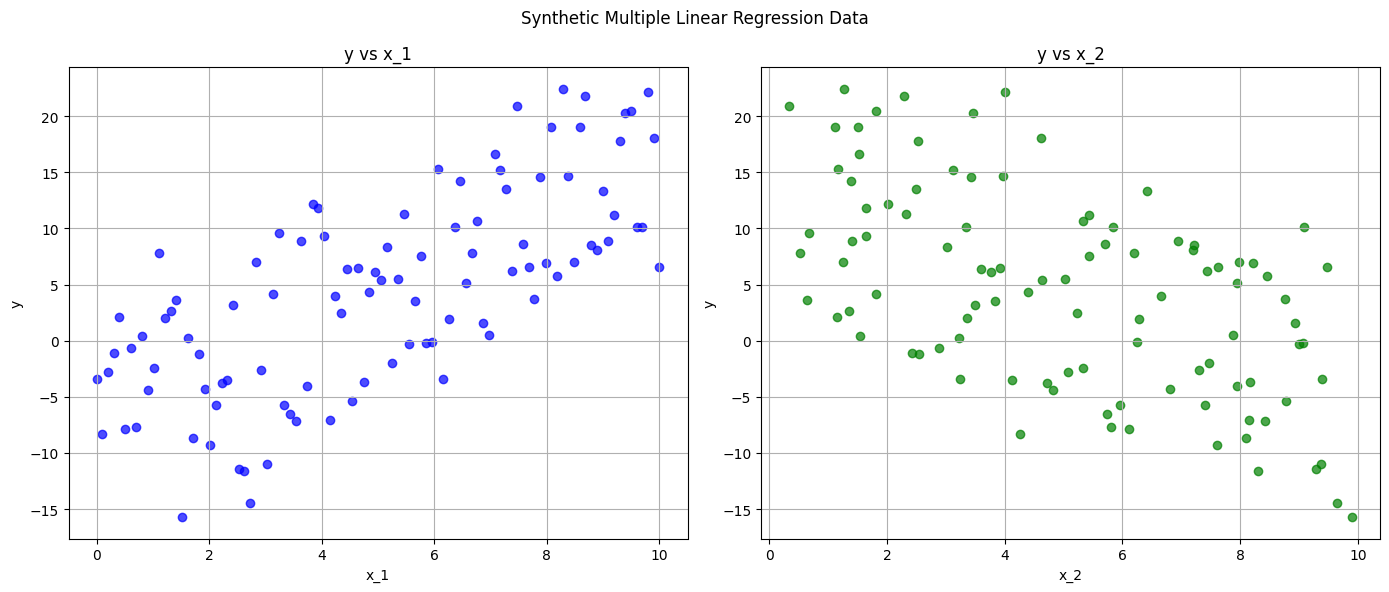

In [162]:
n_samples = 100

x_1 = np.linspace(0, 10, n_samples)
x_2 = np.random.uniform(0, 10, n_samples)

true_slope_x_1 = 2.5
true_slope_x_2 = -2.3
true_intercept = 3.5

# Generate y with some Gaussian noise
noise = np.random.normal(0, 2, n_samples)  # mean=0, std=2
y = true_slope_x_1 * x_1 + true_slope_x_2 * x_2 + true_intercept + noise

# 2D plots: y vs x_1 and y vs x_2
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(x_1, y, alpha=0.7, color='blue')
axes[0].set_xlabel('x_1')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x_1')
axes[0].grid(True)

axes[1].scatter(x_2, y, alpha=0.7, color='green')
axes[1].set_xlabel('x_2')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x_2')
axes[1].grid(True)

plt.suptitle('Synthetic Multiple Linear Regression Data')
plt.tight_layout()
plt.show()

In [163]:
# We need to convert our data x to matrix for use short formulation theta.T * x = y

# We add column just with ones for intercept term (theta_0)

X = np.column_stack((np.ones(n_samples), x_1, x_2))
theta = np.ones((1, X.shape[1]))

In [170]:
def linear_regression(x, theta):
    return np.dot(theta, x.T)

def cost_function(y, y_pred):
    return 0.5 * (np.sum((y_pred - y)**2))

def batch_gradient_descent(theta, y_pred, y, X, learning_rate = 0.0001):
    count_theta = X.shape[1]
    new_theta = np.zeros((1, count_theta))
    
    for i in range(count_theta):
        x_i = X.T[i]
        error = y_pred - y
        by_formula = learning_rate * np.sum(error * x_i)
        new_theta[0][i] = theta[0][i] - by_formula
    
    return new_theta

def stohastic_gradient_descent(theta, y, X, learning_rate = 0.0001):
    
    idx = random.randint(0, X.shape[0] - 1)
    
    x_i = X[idx:idx+1]
    y_i = y[idx]
    
    y_pred_i = x_i @ theta.T
    error_i = y_pred_i - y_i
    
    gradient = error_i * x_i
    
    new_theta = theta - learning_rate * gradient
    
    return new_theta

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

In [148]:
# Batch gradient descent - Calculate gradient for all the data. Learning by this method will be more smooth.

# theta_i = learning_rate * SUM((y_pred - y_true)*x_i)

epoch = 70
errors_epoch_b = []
learning_rate = 0.0001

for i in range(epoch):
    y_pred = linear_regression(X, theta)
    error = cost_function(y, y_pred)
    
    if (i+1) % 5 == 0:
        print(f"Error of epoch {i+1}: {error}")
    
    errors_epoch_b.append(error)
    theta = batch_gradient_descent(theta, y_pred, y, X, learning_rate)

print("------------------------------------------")
print(f"Learned Theta: {theta[0]}")
print("Current Theta: {[3.5 (with noise), 2.5, -2.3]}")
print("------------------------------------------")

Error of epoch 5: 2294.9553194129194
Error of epoch 10: 1234.8102930108168
Error of epoch 15: 726.0325232690888
Error of epoch 20: 481.3406853514813
Error of epoch 25: 363.5262805425553
Error of epoch 30: 306.67084888196376
Error of epoch 35: 279.1054154482594
Error of epoch 40: 265.6153372622034
Error of epoch 45: 258.89105528135576
Error of epoch 50: 255.42081635443705
Error of epoch 55: 253.5174314829862
Error of epoch 60: 252.37027986416885
Error of epoch 65: 251.58986730501942
Error of epoch 70: 250.9890203911197
------------------------------------------
Learned Theta: [ 1.07294953  2.56704678 -1.95351086]
Current Theta: {[3.5 (with noise), 2.5, -2.3]}
------------------------------------------


In [165]:
# Stohastic gradient descent - Calculate gradient for each example in the data. learning by this method will be like chaotically and slow.
# Stohastic gradinet descent learning slow, but this will be good method if we have big data and small computing power to at least obtain a trained model. 

# theta_i_j = learning_rate * SUM((y_pred_j - y_true_j)*x_i_j)

epoch = 200
errors_epoch_s = []
learning_rate = 0.001

y_pred = linear_regression(X, theta)
error = cost_function(y, y_pred)
errors_epoch_s.append(error)

for i in range(epoch):
    
    theta = stohastic_gradient_descent(theta, y, X, learning_rate)
    
    y_pred = linear_regression(X, theta)
    error = cost_function(y, y_pred)
    
    if (i+1) % 5 == 0:
        print(f"Error of epoch {i+1}: {error}")
    
    errors_epoch_s.append(error)

print("------------------------------------------")
print(f"Learned Theta: {theta[0]}")
print("Current Theta: {[3.5 (with noise), 2.5, -2.3]}")

print("------------------------------------------")

Error of epoch 5: 4563.006810342979
Error of epoch 10: 4290.3175200272335
Error of epoch 15: 4220.748044623601
Error of epoch 20: 3198.719936048089
Error of epoch 25: 2836.2128395238738
Error of epoch 30: 2676.1582804139734
Error of epoch 35: 2600.1763120363676
Error of epoch 40: 2596.326826764627
Error of epoch 45: 2355.241581473869
Error of epoch 50: 2092.04090694493
Error of epoch 55: 1950.5790986768084
Error of epoch 60: 1861.6145780298668
Error of epoch 65: 1728.300839524943
Error of epoch 70: 1469.242998430723
Error of epoch 75: 1399.7621009601987
Error of epoch 80: 1358.638947482999
Error of epoch 85: 1294.0239284337656
Error of epoch 90: 1249.059482271992
Error of epoch 95: 1281.833862841241
Error of epoch 100: 1151.3054463300234
Error of epoch 105: 1083.5876354906845
Error of epoch 110: 1028.6083621195814
Error of epoch 115: 961.9775861147825
Error of epoch 120: 933.6618224243097
Error of epoch 125: 911.0076203983571
Error of epoch 130: 912.3324047213373
Error of epoch 135: 78

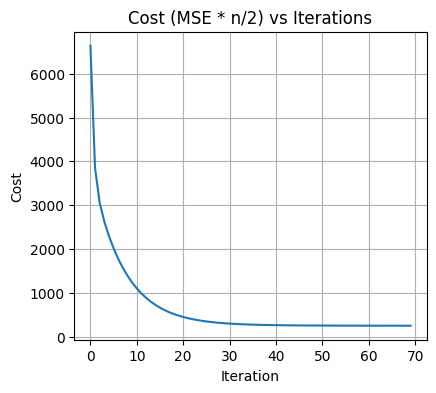

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(errors_epoch_b)
plt.title('Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

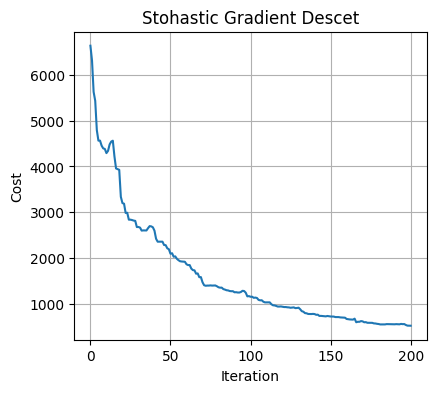

In [166]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(errors_epoch_s)
plt.title('Stohastic Gradient Descet')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)

# Deriving the Normal Equation for Linear Regression (as in CS229)

In Stanford's **CS229** course (Andrew Ng), the Normal Equation is the analytical (closed-form) solution to minimizing the least squares cost function.

For linear regression, the hypothesis is:
$$ h_\theta(x) = \theta^T x $$

The cost function (with a 1/2 factor for convenience in differentiation):
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

In matrix form (X is the $m \times (n+1)$ design matrix, including a column of ones):
$$ J(\theta) = \frac{1}{2} (X\theta - y)^T (X\theta - y) $$

Expanding the expression:
$$ J(\theta) = \frac{1}{2} (\theta^T X^T X \theta - 2\theta^T X^T y + y^T y) $$

(the $y^T y$ term is constant and does not affect the minimum)

Take the gradient with respect to $\theta$ (using matrix differentiation rules):
$$ \nabla_\theta J(\theta) = X^T X \theta - X^T y $$

Set the gradient to zero:
$$ X^T X \theta = X^T y $$

This is the **normal equations**.

If the matrix $X^T X$ is invertible, the solution is:
$$ \theta = (X^T X)^{-1} X^T y $$

This is the **Normal Equation** — the closed-form solution for the optimal parameters.

In [171]:
# Normal equation - close form to find parameters (theta) of the linear regression model fast.

new_theta_ne = normal_equation(X, y) 

print("------------------------------------------")
print(f"Learned Theta: {new_theta_ne}")
print("Current Theta: {[3.5 (with noise), 2.5, -2.3]}")

print("------------------------------------------")

------------------------------------------
Learned Theta: [ 3.05155913  2.42544546 -2.14745681]
Current Theta: {[3.5 (with noise), 2.5, -2.3]}
------------------------------------------
